# Challenge Back-end Python 

Desenvolver uma análise quantitativa e gráfica relacionando o aumento das ações da Petrobrás (PETR4) com as variações da taxa SELIC para os últimos 10 anos.

## Objetivo
Fazer um programa em python para:
- Extrair as informações dos sites: https://www.infomoney.com.br/petrobras-petr4/cotacoes e 
https://www.bcb.gov.br/pec/copom/port/taxaselic.asp e tratá-las;
- Armazenar as informações tratadas no SQLite;
 - Utilizar, de preferência, ORM (object relational mapping)
- Ler as informações do banco e apresentar em formato gráfico.

## Restrições
- Utilizar a biblioteca pandas do Python"

---
## ETL
- Vou utilizar a granularidade **anual** para a análise.
- Será feito 2 scrapping. Para garantir um serviço menos monolítico farei cada scrapping separado. Desta forma é possível garantir uma melhor manutenção de código.


## Granularidade anual
- Tanto a taxa selic quanto a PETR4 devem ser de mesma granularidade
- Nível do grão = ano
- Isso garante insights mais fáceis entre os dados

## Banco de dados
- As 2 tabelas no banco de dados armazenam somente os dados de fechamento.
- Acredito que assim trás uma análise mais fundamentalista sobre índices e ativos financeiros.
- Fiz algumas conversões de tipo para armazenar a menor quantidade possível de dados. 

In [16]:
# Data analysis and data wrangling
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt

# Machine learning
from sklearn.linear_model import LinearRegression

# Other
from IPython.display import Image
from bs4 import BeautifulSoup
from sqlalchemy import create_engine
import IPython.terminal
import configparser
import subprocess
import warnings
import sqlite3
import pprint
import time
import os

## Preparação do diretório

In [17]:
def prepare_directory_work(end_directory: str='notebooks'):
    # Current path
    curr_dir = os.path.dirname (os.path.realpath ("__file__")) 
    
    if curr_dir.endswith(end_directory):
        os.chdir('..')
        return curr_dir
    
    return f'Current working directory: {curr_dir}'

In [21]:
prepare_directory_work(end_directory='notebooks')

'Current working directory: /home/campos/projetos/challenges/challenge-aawz'

## Preparação do ambiente

In [22]:
# from <package>.<module> import <class>
from src.environment.prepare_env import *


main()

Requirements this project:

matplotlib==3.1.1
numpy==1.16.4
pandas==0.24.2
SQLAlchemy==1.3.5
ipython==7.6.1
beautifulsoup4==4.7.1
scikit_learn==0.21.2
atlas==0.27.0

--------------------------------------------------
Configuration Environment:

OS:
Linux
Distributor ID:	Ubuntu
Description:	Ubuntu 19.04
Release:	19.04
Codename:	disco

Python Version:
Python 3.7.3

Pip Version:
pip 19.1.1 from /home/campos/projetos/challenges/challenge-aawz/src/environment/venv/lib/python3.7/site-packages/pip (python 3.7)

Jupyter Version:
4.4.0

--------------------------------------------------

Disk Usage:

data:
16K	data/

virtual env:

all:
415M	.

--------------------------------------------------
Structure This Project:

.
├── data
│   └── desafio_AAWZ.db
├── LICENSE
├── notebooks
│   └── challenge_aawz.ipynb
├── README.md
└── src
    ├── challenge_aawz.py
    ├── environment
    │   ├── config_environment.txt
    │   ├── container
    │   │   └── Dockerfile
    │   ├── create_requirements.sh
    

In [69]:
!python3 src/etl_PETR4.py

get page:  <Response [200]>
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 0
Data columns (total 2 columns):
Ano           10 non-null object
Fechamento    10 non-null float64
dtypes: float64(1), object(1)
memory usage: 240.0+ bytes
None

PETR4 salvo!


### Load

In [70]:
# Create connection
conn = sqlite3.connect('data/desafio_AAWZ.db')

#load data
df_petr4 = pd.read_sql_query("SELECT * FROM petr4", conn)

In [71]:
print(df_petr4)

    Ano  Fechamento
0  2010   27.296875
1  2011   21.484375
2  2012   19.515625
3  2013   17.078125
4  2014   10.023438
5  2015    6.699219
6  2016   14.867188
7  2017   16.093750
8  2018   22.687500
9  2019   27.390625


### Gráficos

#### Gráfico PETR4

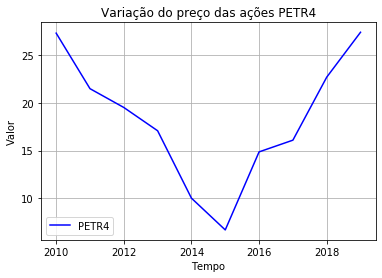

In [63]:
# visualização do gráfico PETR4\n",
x_petr4 = df_petr4['Ano']
y_petr4 = df_petr4['Fechamento']

fig, petr4_grafico = plt.subplots()
plt.plot(x_petr4, y_petr4, color='blue', label='PETR4')
plt.grid()
plt.rcParams['figure.figsize'] = [18, 10] 
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.title("Variação do preço das ações PETR4")
plt.legend(loc="upper right")
plt.legend()
plt.show()

#### Plotagem no mesmo gráfico

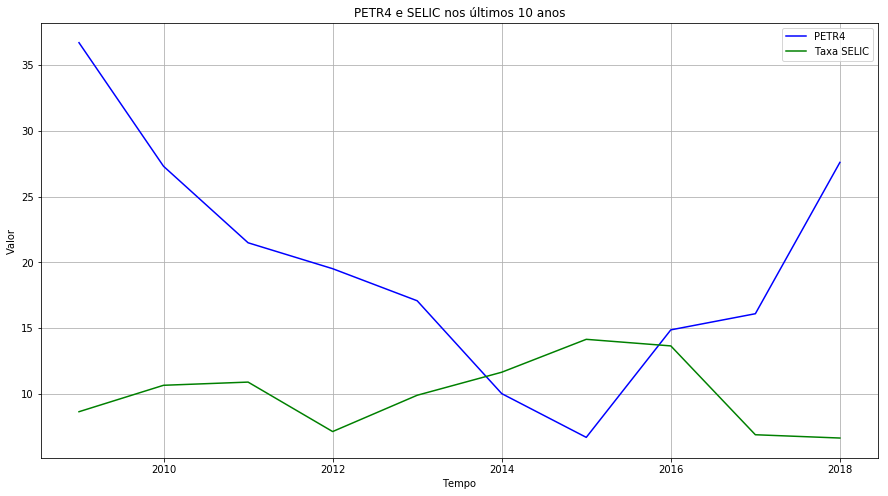

In [16]:
petr4_grafico = plt.plot(x_petr4, y_petr4, color='blue', label='PETR4')
selic_grafico = plt.plot(x_selic, y_selic, color='green', label='Taxa SELIC')

plt.grid()
plt.rcParams['figure.figsize'] = [18, 10] 
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.title("PETR4 e SELIC nos últimos 10 anos")
plt.legend(loc="upper right")
plt.legend()
plt.show()

## Predição do fechamento do preço PETR4 a partir da taxa SELIC

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df_selic[['Taxa SELIC']]

# escolhendo a variável dependente\n",
y = df_petr4[['Fechamento']]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
                                    X,
                                    y,
                                    test_size=0.20)

In [32]:
model = LinearRegression()
model = model.fit(X_train, y_train)
y_pred_model = model.predict(X_test)

# prediction valor aleatório\n",
meta_selic = 10
predicao_petr4 = model.predict(meta_selic)

print(f'A predição do fechamento anual para PETR4, (se meta SELIC = {meta_selic}) baseado numa regressão linear é: R${predicao_petr4} reais.')

A predição do fechamento anual para PETR4, (se meta SELIC = 10) baseado numa regressão linear é: R$[[21.86948204]] reais.


---
#### Copyright
<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">
    <img alt="Creative Commons License" align="right" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" />
</a>

This work by Bruno A. R. M. Campos</span> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.